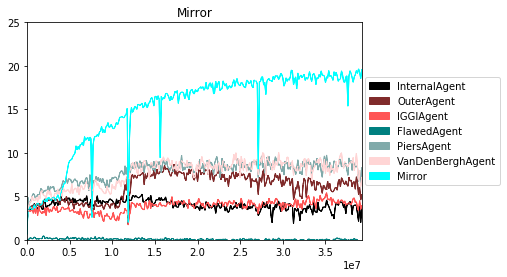

Score with InternalAgent: 3.8
Score with OuterAgent: 5.23
Score with IGGIAgent: 3.97
Score with FlawedAgent: 0.0
Score with PiersAgent: 8.32
Score with VanDenBerghAgent: 7.23
Score with Mirror: 19.63
Average: 6.882857142857143


In [5]:
import os
import re
import csv
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

paths = ["../Logs/Rainbow/Paired/20200517-003117all/checkpoints",
        "../Logs/Rainbow/Paired/20200517-003133rb/checkpoints",
        "../Logs/Rainbow/Paired/20200517-003144Mirror/checkpoints",
        "../Logs/Rainbow/Paired/20200517-003208InternalAgent/checkpoints",
        "../Logs/Rainbow/Paired/20200517-003244OuterAgent/checkpoints",
        "../Logs/Rainbow/Paired/20200517-003259IGGIAgent/checkpoints",
        "../Logs/Rainbow/Paired/20200517-003309FlawedAgent/checkpoints",
        "../Logs/Rainbow/Paired/20200517-003320PiersAgent/checkpoints",
        "../Logs/Rainbow/Paired/20200517-003331VanDenBerghAgent/checkpoints",]

# paths = ["../Logs/Rainbow/Paired/20200515-114852Mirror/checkpoints"]




agents = ['InternalAgent', 'OuterAgent', 'IGGIAgent', 'FlawedAgent', 'PiersAgent', 'VanDenBerghAgent', 'Mirror']

class Entry:
    def __init__(self,iteration,matchups):
        self.iteration=iteration
        self.matchups=matchups

        
    def __str__(self):
        return str(self.iteration) + "\n" + str(self.matchups)


def get_agent_results(path):
    iteration_results = []
    for r, d, f in os.walk(p):  
        for file in f:
            if 'eval' in file and '.swp' not in file:
                iteration = int(file.split('eval')[1])
                matchups = []
                with open(os.path.join(r,file)) as data:
                    lines = data.readlines()
                    for l in lines:
                        tokens = l.split()
                        matchups.append(tokens)
#                         print(matchups)
                iteration_results.append(Entry(iteration,matchups))
            iteration_results.sort(key = lambda x : x.iteration)
    return iteration_results

def make_csv(name,results,score_index):
    with open(name,"w",newline='') as csvfile:
        writer = csv.writer(csvfile, delimiter=';',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
        partners = ["Iteration"] + [m[1] for m in iteration_results[0].matchups]
        writer.writerow(partners)
        for entry in iteration_results:
            line = [entry.iteration] + [m[score_index] for m in entry.matchups]
            writer.writerow(line)
    
def make_plot(name,iteration_results,score_index):
    ax = plt.axes()
    ax.set_title(name)
    ax.set_xlim(0,5000*max((e.iteration for e in iteration_results)))
    ax.set_ylim(0,25)
    
    colors = []
    patch = []
    num_agents = len(iteration_results[0].matchups)
    
    for i in range(num_agents):
        r = (i%3)*0.5
        g = ((i/3)%3)*0.5
        b = (i/3.0)*0.5
        color = (r,g,b)
        colors.append(color)
        
        patch.append(mpatches.Patch(color=color, label=agents[i]))
    
    plt.legend(handles=patch, loc=(1.01,0.25))

    previous_x = None
    previous_y = None
    
    for entry in iteration_results:
        x = entry.iteration*5000
        y_array = [float(m[score_index]) for m in entry.matchups]
        
        for index, y in enumerate(y_array):

            color = colors[index]            
            if previous_x is not None:
                dx = x-previous_x
                dy = y-previous_y[index]
            
                ax.arrow(x,y,-dx,-dy,fc = 'k',ec = color)
#                 print(x,dx,y,dy)
        
        previous_x = x
        previous_y = y_array
            
    plt.show()


score_index = 2
# with open("results.csv","w",newline='') as csvfile:
for p in paths:
    agent = p[38:-12]
    name = agent + str(score_index) + ".csv"
    iteration_results = get_agent_results(p)
    make_csv(name,iteration_results,score_index)
    
    make_plot(agent,iteration_results,score_index)
    
    i=0
    average = 0.0
    for m in iteration_results[-1].matchups:
        print("Score with {0}: {1}".format(m[1],m[score_index]))
        average += float(m[score_index])
    print("Average: {0}".format(average/len(iteration_results[-1].matchups)))
    

        
        
    
    


# #         for i, r in enumerate(iteration_results):
# #             if i<5:
# #                 print(r)
                
#         writer = csv.writer(csvfile, delimiter=';',
#                             quotechar='|', quoting=csv.QUOTE_MINIMAL)
#         print(iteration_results[0])
#         partners = ["Iteration"] + [m[1] for m in iteration_results[0].matchups]
#         writer.writerow(partners)
#         print(partners)
#         for entry in iteration_results:
#             line = [entry.iteration] + [m[score_index] for m in entry.matchups]
#             writer.writerow(line)
# #         for i in range(iteration_results[0]
            
    
#             print(iteration_results)
                    
#                 data = iteration_stats = parse_file(file)